In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from PIL import Image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [1]:
import tensorflow as tf
print(tf.__version__)

2.12.0


In [3]:
tf.config.list_physical_devices('GPU')

[]

# EDA on 10% training data

In [20]:
# Define the data directories

train_dir = r"E:\Machine Learning-A-Z-Codes-Datasets\major project\plant-disease-classification\dataset\10percent_dataset\train"
valid_dir = r"E:\Machine Learning-A-Z-Codes-Datasets\major project\plant-disease-classification\dataset\10percent_dataset\valid"


In [22]:
diseases = os.listdir(train_dir)
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___

In [7]:
print("Total plant classes are: {}".format(len(diseases)))

Total plant classes are: 38


In [8]:
plants = []
NumberOfDiseases = 0
for plant in diseases:
    #print(plant)
    if plant.split('___')[0] not in plants:
        plants.append(plant.split('___')[0])
    if plant.split('___')[1] != 'healthy':
        NumberOfDiseases += 1

In [9]:
# unique plants in the dataset
print(f"Unique Plants are: \n{plants}")

Unique Plants are: 
['Apple', 'Blueberry', 'Cherry', 'Corn', 'Grape', 'Orange', 'Peach', 'Pepper,_bell', 'Potato', 'Raspberry', 'Soybean', 'Squash', 'Strawberry', 'Tomato']


In [10]:
# number of unique diseases
print("Number of diseases: {}".format(NumberOfDiseases))

Number of diseases: 26


In [12]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple___Apple_scab                                       110
Apple___Black_rot                                        110
Apple___Cedar_apple_rust                                 110
Apple___healthy                                          176
Blueberry___healthy                                      165
Cherry___healthy                                         121
Cherry___Powdery_mildew                                  110
Corn___Cercospora_leaf_spot Gray_leaf_spot               110
Corn___Common_rust                                       110
Corn___healthy                                           110
Corn___Northern_Leaf_Blight                              110
Grape___Black_rot                                        110
Grape___Esca_(Black_Measles)                             110
Grape___healthy                                          110
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)               110
Orange___Haunglongbing_(Citrus_greening)                 550
Peach___Bacterial_spot                                   220
Peach___healthy                                          110
Pepper,_bell___Bacterial_spot                            110
Pepper,_bell___healthy                                   153
Potato___Early_blight                                    110
Potato___healthy                                         110
Potato___Late_blight                                     110
Raspberry___healthy                                      110
Soybean___healthy                                        473
Squash___Powdery_mildew                                  110
Strawberry___healthy                                      99
Strawberry___Leaf_scorch                                 110
Tomato___Bacterial_spot                                  220
Tomato___Early_blight                                    110
Tomato___healthy                                         165
Tomato___Late_blight                                     198
Tomato___Leaf_Mold                                       110
Tomato___Septoria_leaf_spot                              165
Tomato___Spider_mites Two-spotted_spider_mite            121
Tomato___Target_Spot                                     132
Tomato___Tomato_mosaic_virus                             110
Tomato___Tomato_Yellow_Leaf_Curl_Virus                   484

In [13]:
nums_2 = {}
for disease in diseases:
    nums_2[disease] = len(os.listdir(valid_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class_2 = pd.DataFrame(nums_2.values(), index=nums_2.keys(), columns=["no. of images"])
img_per_class_2

no. of images
Apple___Apple_scab                                       504
Apple___Black_rot                                        497
Apple___Cedar_apple_rust                                 440
Apple___healthy                                          502
Blueberry___healthy                                      454
Cherry___healthy                                         456
Cherry___Powdery_mildew                                  421
Corn___Cercospora_leaf_spot Gray_leaf_spot               410
Corn___Common_rust                                       477
Corn___healthy                                           465
Corn___Northern_Leaf_Blight                              477
Grape___Black_rot                                        472
Grape___Esca_(Black_Measles)                             480
Grape___healthy                                          423
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)               430
Orange___Haunglongbing_(Citrus_greening)                 503
Peach___Bacterial_spot                                   459
Peach___healthy                                          432
Pepper,_bell___Bacterial_spot                            478
Pepper,_bell___healthy                                   497
Potato___Early_blight                                    485
Potato___healthy                                         456
Potato___Late_blight                                     485
Raspberry___healthy                                      445
Soybean___healthy                                        505
Squash___Powdery_mildew                                  434
Strawberry___healthy                                     456
Strawberry___Leaf_scorch                                 444
Tomato___Bacterial_spot                                  425
Tomato___Early_blight                                    480
Tomato___healthy                                         481
Tomato___Late_blight                                     463
Tomato___Leaf_Mold                                       470
Tomato___Septoria_leaf_spot                              436
Tomato___Spider_mites Two-spotted_spider_mite            435
Tomato___Target_Spot                                     457
Tomato___Tomato_mosaic_virus                             448
Tomato___Tomato_Yellow_Leaf_Curl_Virus                   490

In [14]:
nums.keys()==nums_2.keys()

True

Text(0.5, 1.0, 'Images per each class of plant disease')

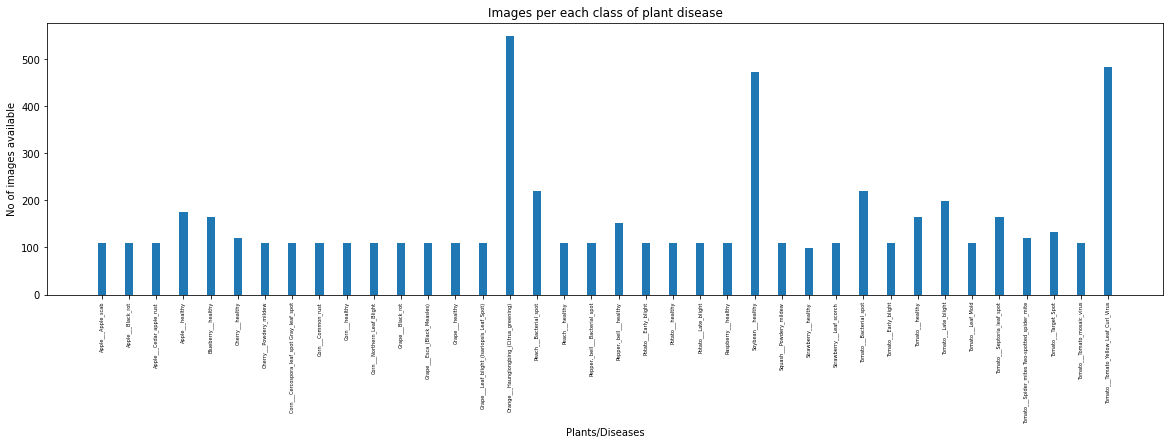

In [15]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [16]:
nums.values()

dict_values([110, 110, 110, 176, 165, 121, 110, 110, 110, 110, 110, 110, 110, 110, 110, 550, 220, 110, 110, 153, 110, 110, 110, 110, 473, 110, 99, 110, 220, 110, 165, 198, 110, 165, 121, 132, 110, 484])

In [17]:
# total images for training
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 5972 images for training


In [18]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)



    # Read in the image and plot it using matplotlib
    
    img = mpimg.imread(os.path.join(target_folder, random_image[0]))    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    print(f"Image shape: {img.shape}") # show the shape of the image

    return img
    

In [65]:
'''import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class,i):
    
    # Setup target directory (we'll view images from here)
    target_folder = os.path.join(target_dir, target_class)
    #target_folder = os.path.join(target_folder, target_class)
    #print(target_folder)
    # Get a random image path
    random_image = os.listdir(target_folder)
    #print("imahe name : " , random_image)
    # Read in the image and plot it using matplotlib
    file_path = os.path.join(target_folder, random_image[i])
    #print("File Path:", file_path)
    
    try:
        img = mpimg.imread(file_path)
        #plt.imshow(img)
        #plt.title(target_class)
        #plt.axis("off")
        #print(f"Image shape: {img.shape}")  # show the shape of the image
        #plt.show()
        #print(f"{i}",random_image[i])
    except FileNotFoundError:
        print("===========File not found:==========")
        print(f"{i}",random_image[i])
        #print()
        #print()
        return None

    #print()
    #print()
    return img'''


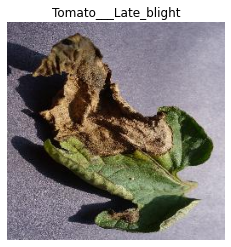

Image shape: (256, 256, 3)


In [19]:
# View a random image from the training dataset

img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(diseases)) # get a random class name'''

In [20]:
img

array([[[ 64,  57,  75],
        [109, 102, 120],
        [ 75,  68,  86],
        ...,
        [146, 143, 162],
        [143, 140, 159],
        [139, 136, 155]],

       [[114, 107, 125],
        [ 94,  87, 105],
        [ 61,  54,  72],
        ...,
        [146, 143, 162],
        [145, 142, 161],
        [143, 140, 159]],

       [[ 87,  80,  98],
        [105,  98, 116],
        [ 96,  89, 107],
        ...,
        [146, 143, 162],
        [147, 144, 163],
        [147, 144, 163]],

       ...,

       [[113, 109, 126],
        [ 86,  82,  99],
        [127, 123, 140],
        ...,
        [189, 185, 200],
        [188, 184, 199],
        [190, 186, 201]],

       [[128, 124, 141],
        [134, 130, 147],
        [ 93,  89, 106],
        ...,
        [189, 185, 200],
        [187, 183, 198],
        [187, 183, 198]],

       [[143, 139, 156],
        [145, 141, 158],
        [104, 100, 117],
        ...,
        [194, 190, 205],
        [191, 187, 202],
        [191, 187, 202]]

In [21]:
'''# View a random image from the training dataset 10 times //5   19
for i in range(100): 
    try:
        img = view_random_image(target_dir=valid_dir,
                                target_class=diseases[2],i=i)
    except FileNotFoundError as e: 
        print(e)
        continue
'''


'# View a random image from the training dataset 10 times //5   19\nfor i in range(100): \n    try:\n        img = view_random_image(target_dir=valid_dir,\n                                target_class=diseases[2],i=i)\n    except FileNotFoundError as e: \n        print(e)\n        continue\n'

# Data Preparation for training

In [90]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 5972 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [22]:
# Get a sample of the training data batch 
images, labels = train_data.next() # get the 'next' batch of images/labels
len(images), len(labels)

(32, 32)

In [23]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.48235297, 0.4431373 , 0.6784314 ],
          [0.5411765 , 0.5019608 , 0.7372549 ],
          [0.5882353 , 0.54901963, 0.7843138 ],
          ...,
          [0.5294118 , 0.49411768, 0.70980394],
          [0.5019608 , 0.4666667 , 0.68235296],
          [0.47450984, 0.43921572, 0.654902  ]],
 
         [[0.5254902 , 0.48627454, 0.72156864],
          [0.54509807, 0.5058824 , 0.7411765 ],
          [0.54509807, 0.5058824 , 0.7411765 ],
          ...,
          [0.5176471 , 0.48235297, 0.69803923],
          [0.50980395, 0.47450984, 0.6901961 ],
          [0.49411768, 0.45882356, 0.6745098 ]],
 
         [[0.54901963, 0.50980395, 0.74509805],
          [0.5372549 , 0.49803925, 0.73333335],
          [0.5137255 , 0.47450984, 0.70980394],
          ...,
          [0.49803925, 0.46274513, 0.6784314 ],
          [0.48235297, 0.44705886, 0.6627451 ],
          [0.4666667 , 0.43137258, 0.64705884]],
 
         ...,
 
         [[0.45098042, 0.41176474, 0.61960787],
          [0.45490

In [24]:
# View the first batch of label
np.set_printoptions(threshold=np.inf)
print(labels)

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

# Simple CNN Model

In [32]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model_1 = Sequential([
  Conv2D(5, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(5, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(5, 3, activation='relu'),
  Conv2D(5, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(38, activation='softmax') # changed to have 38 neurons (same as number of classes) and 'softmax' activation
])



In [33]:
# Compile the model
model_1.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [34]:
# Fit the model
hist_1= model_1.fit(train_data, # now 38 different classes
                        epochs=6,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/6
187/187 [==============================] - 51s 268ms/step - loss: 2.3305 - accuracy: 0.3747 - val_loss: 2.8149 - val_accuracy: 0.2979
Epoch 2/6
187/187 [==============================] - 37s 198ms/step - loss: 1.1010 - accuracy: 0.6772 - val_loss: 2.9931 - val_accuracy: 0.3156
Epoch 3/6
187/187 [==============================] - 37s 199ms/step - loss: 0.6110 - accuracy: 0.8203 - val_loss: 3.0293 - val_accuracy: 0.3996
Epoch 4/6
187/187 [==============================] - 36s 194ms/step - loss: 0.3546 - accuracy: 0.8985 - val_loss: 3.4423 - val_accuracy: 0.3914
Epoch 5/6
187/187 [==============================] - 37s 197ms/step - loss: 0.1966 - accuracy: 0.9457 - val_loss: 3.8165 - val_accuracy: 0.4122
Epoch 6/6
187/187 [==============================] - 37s 200ms/step - loss: 0.1078 - accuracy: 0.9689 - val_loss: 4.6720 - val_accuracy: 0.3838


In [35]:
model_1.evaluate(test_data)

550/550 [==============================] - 31s 57ms/step - loss: 4.6720 - accuracy: 0.3838


[4.672049045562744, 0.3837924003601074]

In [36]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 5)       140       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 5)       230       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 110, 110, 5)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 5)       230       
                                                                 
 conv2d_11 (Conv2D)          (None, 106, 106, 5)       230       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 53, 53, 5)        0         
 2D)                                                  

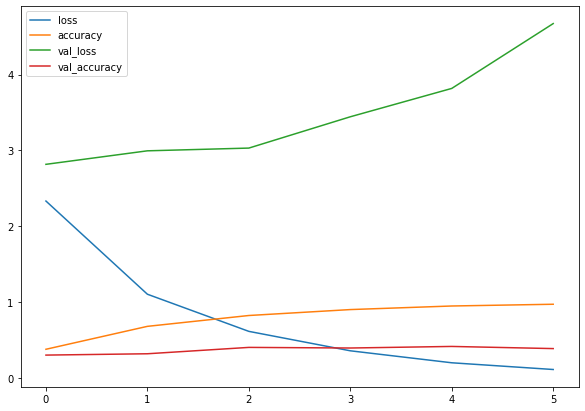

In [37]:
# Plot the training curves
import pandas as pd
pd.DataFrame(hist_1.history).plot(figsize=(10, 7));

In [25]:
# Plot the validation and training data separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """ 
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

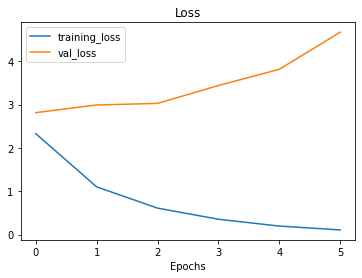

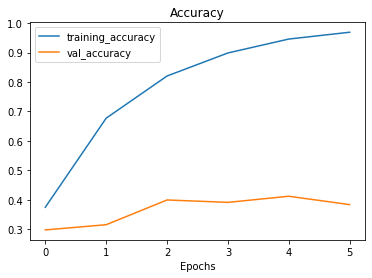

In [39]:
# Check out the loss curves of model_4
plot_loss_curves(hist_1)

# Prediction

In [17]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [27]:
# Load in and preprocess our custom image
TomatoHealthy = load_and_prep_image(r"D:\major project\plant-disease-classification\dataset\test\TomatoHealthy4.JPG")
TomatoHealthy

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.9929772 , 0.9929772 , 1.        ],
        [0.9971388 , 0.9971388 , 1.        ],
        [0.99969983, 0.99969983, 0.9998999 ],
        [0.9952381 , 0.9952381 , 0.9994398 ],
        [0.9934774 , 0.9934774 , 0.99897957],
        [0.9977591 , 0.9977591 , 0.9990996 ],
        [0.99911964, 0.99911964, 0.99967986],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9994398 , 0.9994398 , 1.        ],
        [0.9995598 , 0.9995598 , 1.        ],
        [1.        , 1.        , 1.        ],
        [0.9956582 , 0.9956582 , 0.9995798 ],
        [0.98105234, 0.98105234, 0.9888955 ],
        [0.98173267, 0.98173267, 0.9895758 ],
        [0.9988196 , 0.99

In [28]:
# Add an extra axis
print(f"Shape before new dimension: {TomatoHealthy.shape}")
TomatoHealthy = tf.expand_dims(TomatoHealthy, axis=0) # add an extra dimension at axis 0
#steak = steak[tf.newaxis, ...] # alternative to the above, '...' is short for 'every other dimension'
print(f"Shape after new dimension: {TomatoHealthy.shape}")
TomatoHealthy

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


<tf.Tensor: shape=(1, 224, 224, 3), dtype=float32, numpy=
array([[[[0.9929772 , 0.9929772 , 1.        ],
         [0.9971388 , 0.9971388 , 1.        ],
         [0.99969983, 0.99969983, 0.9998999 ],
         [0.9952381 , 0.9952381 , 0.9994398 ],
         [0.9934774 , 0.9934774 , 0.99897957],
         [0.9977591 , 0.9977591 , 0.9990996 ],
         [0.99911964, 0.99911964, 0.99967986],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.9994398 , 0.9994398 , 1.        ],
         [0.9995598 , 0.9995598 , 1.        ],
         [1.        , 1.        , 1.        ],
         [0.9956582 , 0.9956582 , 0.9995798 ],
         [0.98105234, 0.98105234, 0.9888955 ],
         [0.98173267, 0.98173267, 0.9895758 ],
  

In [44]:
# Make a prediction on custom image tensor
pred = model_1.predict(TomatoHealthy)
pred

1/1 [==============================] - 0s 439ms/step


array([[5.2035101e-09, 5.7514310e-08, 2.3667150e-13, 4.2572090e-01,
        8.6972938e-07, 6.5932340e-07, 5.4853024e-19, 3.1343155e-04,
        6.5215689e-18, 7.8011431e-07, 5.7993464e-05, 6.2563538e-11,
        1.2602569e-08, 6.9299377e-29, 2.2074917e-15, 1.4611833e-10,
        6.6683650e-02, 2.2808708e-06, 1.8655984e-06, 6.6711436e-07,
        7.6237296e-07, 7.5454047e-08, 2.8560329e-10, 4.0070372e-15,
        9.2742605e-09, 2.5467190e-01, 3.8407025e-12, 1.5737301e-09,
        1.4489025e-14, 1.0950863e-05, 7.0742503e-02, 3.0900612e-08,
        9.7319193e-05, 1.2901738e-06, 1.8467497e-02, 2.1115917e-12,
        4.7347312e-06, 1.6321978e-01]], dtype=float32)

In [18]:
# Adjust function to work with multi-class
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

In [23]:
class_names =np.array(diseases)
class_names

array(['Apple___Apple_scab', 'Apple___Black_rot',
       'Apple___Cedar_apple_rust', 'Apple___healthy',
       'Blueberry___healthy', 'Cherry___healthy',
       'Cherry___Powdery_mildew',
       'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust',
       'Corn___healthy', 'Corn___Northern_Leaf_Blight',
       'Grape___Black_rot', 'Grape___Esca_(Black_Measles)',
       'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
       'Orange___Haunglongbing_(Citrus_greening)',
       'Peach___Bacterial_spot', 'Peach___healthy',
       'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy',
       'Potato___Early_blight', 'Potato___healthy',
       'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy',
       'Squash___Powdery_mildew', 'Strawberry___healthy',
       'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot',
       'Tomato___Early_blight', 'Tomato___healthy',
       'Tomato___Late_blight', 'Tomato___Leaf_Mold',
       'Tomato___Septoria_le

In [12]:
test_img_path = r"E:\Machine Learning-A-Z-Codes-Datasets\major project\plant-disease-classification\dataset\test"
test_images = os.listdir(test_img_path)
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

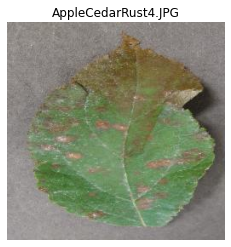

In [13]:
# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
target_class =random.choice(test_images)
image_path = os.path.join(test_img_path,target_class)
image_path
img = mpimg.imread(image_path)    
plt.imshow(img)
plt.title(target_class)
plt.axis("off")
plt.show()

In [14]:
def random_test_image(test_img_path,test_image):
    target_class =random.choice(test_images)
    image_path = os.path.join(test_img_path,target_class)
    image_path
    img = mpimg.imread(image_path)    
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    plt.show()
    return image_path

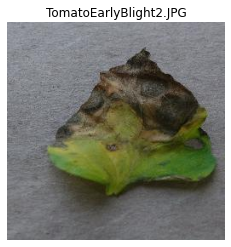

In [186]:
img_1 = random_test_image(test_img_path=test_img_path,test_image=test_images)

In [184]:
loaded_model = tf.keras.models.load_model("model_1_38%")

1/1 [==============================] - 0s 51ms/step


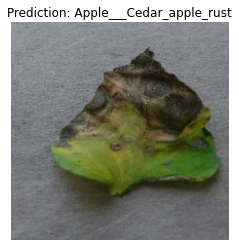

In [187]:
# Make a prediction using model_1
pred_and_plot(model=loaded_model, 
              filename=img_1, 
              class_names=class_names)

In [85]:
# Save a model
model_1.save("model_1_38%")

INFO:tensorflow:Assets written to: model_1_38%\assets


INFO:tensorflow:Assets written to: model_1_38%\assets


In [59]:
loaded_model.evaluate(test_data)

550/550 [==============================] - 30s 55ms/step - loss: 4.6720 - accuracy: 0.3838


[4.672048568725586, 0.3837924003601074]

In [60]:
model_1.evaluate(test_data)

550/550 [==============================] - 30s 55ms/step - loss: 4.6720 - accuracy: 0.3838


[4.6720499992370605, 0.3837924003601074]

# transfer learning

In [37]:
# Create tensorboard callback (functionized because need to create a new one for each model)
import datetime
def create_tensorboard_callback(dir_name, experiment_name):
  log_dir = dir_name + "/" + experiment_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
  tensorboard_callback = tf.keras.callbacks.TensorBoard(
      log_dir=log_dir
  )
  print(f"Saving TensorBoard log files to: {log_dir}")
  return tensorboard_callback

## Creating models using TensorFlow Hub

In the past we've used TensorFlow to create our own models layer by layer from scratch.

Now we're going to do a similar process, except the majority of our model's layers are going to come from [TensorFlow Hub](https://tfhub.dev/).

In fact, we're going to use two models from TensorFlow Hub:
1. [ResNetV2](https://arxiv.org/abs/1603.05027) -  a state of the art computer vision model architecture from 2016.
2. [EfficientNet](https://arxiv.org/abs/1905.11946) - a state of the art computer vision architecture from 2019.

State of the art means that at some point, both of these models have achieved the lowest error rate on [ImageNet (ILSVRC-2012-CLS)](http://www.image-net.org/), the gold standard of computer vision benchmarks.

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers

In [39]:
IMAGE_SHAPE = (224, 224)
BATCH_SIZE = 32

In [26]:
# Resnet 50 V2 feature vector
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/4"

# New: EfficientNetB0 feature vector (version 2)
efficientnet_url = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2"

In [124]:
def create_model(model_url, num_classes=38):
  """Takes a TensorFlow Hub URL and creates a Keras Sequential model with it.
  
  Args:
    model_url (str): A TensorFlow Hub feature extraction URL.
    num_classes (int): Number of output neurons in output layer,
      should be equal to number of target classes, default 10.

  Returns:
    An uncompiled Keras Sequential model with model_url as feature
    extractor layer and Dense output layer with num_classes outputs.
  """
  # Download the pretrained model and save it as a Keras layer
  feature_extractor_layer = hub.KerasLayer(model_url,
                                           trainable=False, # freeze the underlying patterns
                                           name='feature_extraction_layer',
                                           input_shape=IMAGE_SHAPE+(3,)) # define the input image shape
  
  # Create our own model
  model = tf.keras.Sequential([
    feature_extractor_layer, # use the feature extraction layer as the base
    layers.Dense(num_classes, activation='softmax', name='output_layer') # create our own output layer      
  ])

  return model

# resnet_model : ResNet50.

In [74]:
# Create model
resnet_model = create_model(resnet_url, num_classes=len(diseases))

# Compile
resnet_model.compile(loss='categorical_crossentropy',
                     optimizer=tf.keras.optimizers.Adam(),
                     metrics=['accuracy'])

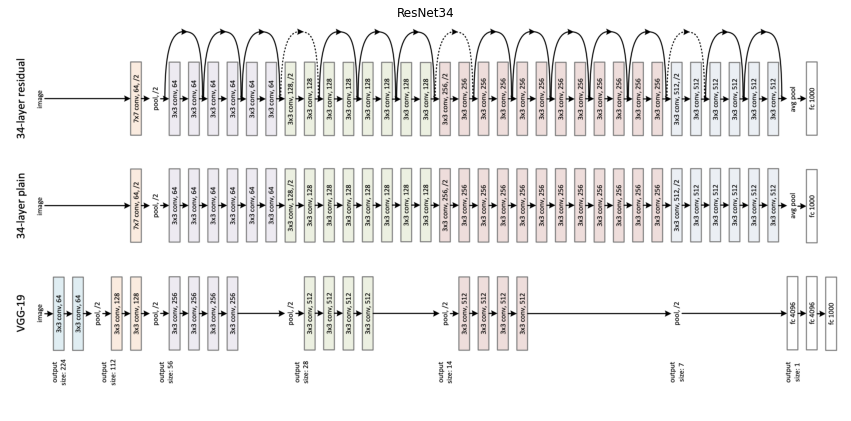

In [40]:
image_path = r"D:\major project\plant-disease-classification\resnet_architecture.jpg"
img = mpimg.imread(image_path) 
plt.figure(figsize=(15, 10))    
plt.imshow(img)
plt.title("ResNet34")
plt.axis("off")
plt.show()


*What our current model looks like. A ResNet50V2 backbone with a custom dense layer on top (38 classes instead of 1000 ImageNet classes). **Note:** The Image shows ResNet34 instead of ResNet50.

In [76]:
len(train_data)

187

In [77]:
# Fit the model
resnet_history = resnet_model.fit(train_data,
                                  epochs=5,
                                  steps_per_epoch=len(train_data),
                                  validation_data=test_data,
                                  validation_steps=len(test_data),
                                  # Add TensorBoard callback to model (callbacks parameter takes a list)
                                  callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", # save experiment logs here
                                                                         experiment_name="resnet50V2")]) # name of log files

Saving TensorBoard log files to: tensorflow_hub/resnet50V2/20231029-025921
Epoch 1/5
187/187 [==============================] - 126s 642ms/step - loss: 1.0373 - accuracy: 0.7435 - val_loss: 0.9884 - val_accuracy: 0.7215
Epoch 2/5
187/187 [==============================] - 101s 540ms/step - loss: 0.2866 - accuracy: 0.9337 - val_loss: 0.8084 - val_accuracy: 0.7682
Epoch 3/5
187/187 [==============================] - 101s 542ms/step - loss: 0.1767 - accuracy: 0.9637 - val_loss: 0.7883 - val_accuracy: 0.7766
Epoch 4/5
187/187 [==============================] - 101s 544ms/step - loss: 0.1214 - accuracy: 0.9777 - val_loss: 0.8160 - val_accuracy: 0.7692
Epoch 5/5
187/187 [==============================] - 102s 546ms/step - loss: 0.0883 - accuracy: 0.9866 - val_loss: 0.8091 - val_accuracy: 0.7763


In [78]:
resnet_model.evaluate(test_data)

550/550 [==============================] - 81s 146ms/step - loss: 0.8091 - accuracy: 0.7763


[0.8091397881507874, 0.7763487100601196]

In [84]:
resnet_model.save("resnet50V2_78%")

INFO:tensorflow:Assets written to: resnet50V2_78%\assets


INFO:tensorflow:Assets written to: resnet50V2_78%\assets


In [87]:
saved_resnet50V2_model = tf.keras.models.load_model("resnet50V2_78%")
saved_resnet50V2_model.evaluate(test_data)

550/550 [==============================] - 78s 140ms/step - loss: 0.8091 - accuracy: 0.7763


[0.809140145778656, 0.7763487100601196]

after only 5 epochs, the ResNetV250 feature extraction model was able to blow any of the architectures we made out of the water, achieving around 98% accuracy on the training set and nearly 80% accuracy on the test set...**with only 10 percent of the training images!**

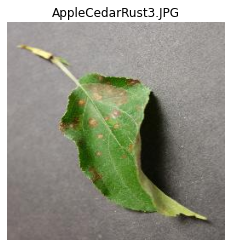

In [94]:
img_test = random_test_image(test_img_path=test_img_path,test_image=test_images)

1/1 [==============================] - 0s 36ms/step


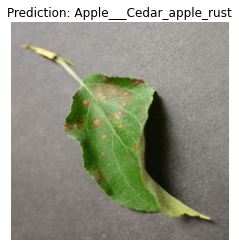

In [95]:
# Make a prediction using model_1
pred_and_plot(model=resnet_model, 
              filename=img_test, 
              class_names=class_names)

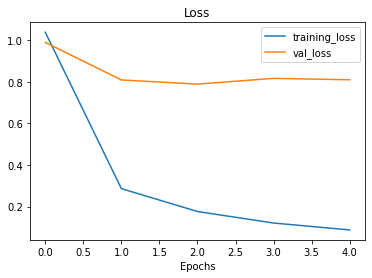

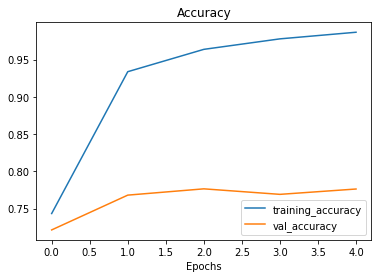

In [96]:
plot_loss_curves(resnet_history)

In [98]:
resnet_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 2048)             23564800  
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 38)                77862     
                                                                 
Total params: 23,642,662
Trainable params: 77,862
Non-trainable params: 23,564,800
_________________________________________________________________


You can see the power of TensorFlow Hub here. The feature extraction layer has 23,642,662 parameters which are prelearned patterns the model has already learned on the ImageNet dataset. Since we set `trainable=False`, these patterns remain frozen (non-trainable) during training.

This means during training the model updates the 77,862 parameters in the output layer to suit our dataset.

# Efficientnet_mode : EfficientNetB0 

In [29]:
# Create model
efficientnet_model = create_model(model_url=efficientnet_url, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=len(diseases))

# Compile EfficientNet model
efficientnet_model.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])



In [101]:
# Fit EfficientNet model 
efficientnet_history = efficientnet_model.fit(train_data, # only use 10% of training data
                                              epochs=6, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0/20231029-032259
Epoch 1/6
187/187 [==============================] - 112s 548ms/step - loss: 1.4155 - accuracy: 0.6922 - val_loss: 1.2217 - val_accuracy: 0.6987
Epoch 2/6
187/187 [==============================] - 65s 346ms/step - loss: 0.4591 - accuracy: 0.9168 - val_loss: 1.0013 - val_accuracy: 0.7295
Epoch 3/6
187/187 [==============================] - 64s 344ms/step - loss: 0.2926 - accuracy: 0.9489 - val_loss: 0.8823 - val_accuracy: 0.7528
Epoch 4/6
187/187 [==============================] - 64s 345ms/step - loss: 0.2157 - accuracy: 0.9640 - val_loss: 0.8349 - val_accuracy: 0.7622
Epoch 5/6
187/187 [==============================] - 64s 345ms/step - loss: 0.1708 - accuracy: 0.9727 - val_loss: 0.8031 - val_accuracy: 0.7711
Epoch 6/6
187/187 [==============================] - 64s 344ms/step - loss: 0.1396 - accuracy: 0.9802 - val_loss: 0.7940 - val_accuracy: 0.7724


In [103]:
efficientnet_model.evaluate(test_data)

550/550 [==============================] - 55s 99ms/step - loss: 0.7940 - accuracy: 0.7724


[0.7940218448638916, 0.7724220156669617]

In [102]:
efficientnet_model.save("efficientnetB0_77%")

INFO:tensorflow:Assets written to: efficientnetB0_77%\assets


INFO:tensorflow:Assets written to: efficientnetB0_77%\assets


In [104]:
saved_efficientnetB0_model = tf.keras.models.load_model("efficientnetB0_77%")
saved_efficientnetB0_model.evaluate(test_data)

550/550 [==============================] - 49s 87ms/step - loss: 0.7940 - accuracy: 0.7724


[0.794021725654602, 0.7724220156669617]

The EfficientNetB0 model give littel less accuracy than the ResNetV250 model! Achieving over 77% accuracy on the test set...again **with only 10% of the training data**.

In [109]:
efficientnet_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extraction_layer (K  (None, 1280)             5919312   
 erasLayer)                                                      
                                                                 
 output_layer (Dense)        (None, 38)                48678     
                                                                 
Total params: 5,967,990
Trainable params: 48,678
Non-trainable params: 5,919,312
_________________________________________________________________


It seems despite having over four times less parameters (5,919,312 vs.23,564,800 ) than the ResNet50V2 extraction layer, the  EfficientNetB0 feature extraction layer yields equal  performance

# ResNetV250 version 1

In [31]:
# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url_v1 = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [108]:
# Create model
efficientnet_model_v1 = create_model(model_url=efficientnet_url_v1, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=len(diseases))

# Compile EfficientNet model
efficientnet_model_v1.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history_v1 = efficientnet_model_v1.fit(train_data, # only use 10% of training data
                                              epochs=6, # train for 5 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0_v1")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0_v1/20231029-034434
Epoch 1/6
187/187 [==============================] - 96s 459ms/step - loss: 1.3448 - accuracy: 0.7251 - val_loss: 1.1698 - val_accuracy: 0.7054
Epoch 2/6
187/187 [==============================] - 73s 394ms/step - loss: 0.4053 - accuracy: 0.9342 - val_loss: 0.9193 - val_accuracy: 0.7492
Epoch 3/6
187/187 [==============================] - 75s 402ms/step - loss: 0.2482 - accuracy: 0.9603 - val_loss: 0.7839 - val_accuracy: 0.7810
Epoch 4/6
187/187 [==============================] - 72s 387ms/step - loss: 0.1793 - accuracy: 0.9730 - val_loss: 0.7385 - val_accuracy: 0.7882
Epoch 5/6
187/187 [==============================] - 72s 388ms/step - loss: 0.1400 - accuracy: 0.9782 - val_loss: 0.7067 - val_accuracy: 0.7954
Epoch 6/6
187/187 [==============================] - 72s 388ms/step - loss: 0.1113 - accuracy: 0.9851 - val_loss: 0.6854 - val_accuracy: 0.7989


the version 1 of efficientnet_model giving best performence with 80% accuracy over just 10% data

In [110]:
efficientnet_model_v1.evaluate(test_data)

550/550 [==============================] - 56s 101ms/step - loss: 0.6854 - accuracy: 0.7989


[0.6854395866394043, 0.7988845705986023]

In [111]:
efficientnet_model_v1.save("efficientnet_model_v1_80%")

INFO:tensorflow:Assets written to: efficientnet_model_v1_80%\assets


INFO:tensorflow:Assets written to: efficientnet_model_v1_80%\assets


In [91]:
saved_efficientnetB0_model_v1 =tf.keras.models.load_model("efficientnet_model_v1_80%")
saved_efficientnetB0_model_v1.evaluate(test_data)

550/550 [==============================] - 68s 119ms/step - loss: 0.6854 - accuracy: 0.7989


[0.6854395866394043, 0.7988845705986023]

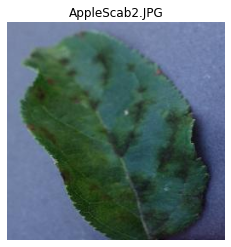

In [112]:
img_1 = random_test_image(test_img_path=test_img_path,test_image=test_images)

1/1 [==============================] - 0s 153ms/step


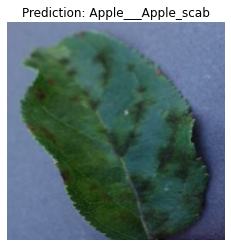

In [113]:
# Make a prediction using model_1
pred_and_plot(model=saved_efficientnetB0_model_v1, 
              filename=img_1, 
              class_names=class_names)

# EDA on full training data

In [114]:
# Define the data directories

train_dir = r"D:\major project\plant-disease-classification\dataset\orignal_dataset\train"
valid_dir = r"D:\major project\plant-disease-classification\dataset\orignal_dataset\valid"


In [115]:
diseases = os.listdir(train_dir)
print(diseases)

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry___healthy', 'Cherry___Powdery_mildew', 'Corn___Cercospora_leaf_spot Gray_leaf_spot', 'Corn___Common_rust', 'Corn___healthy', 'Corn___Northern_Leaf_Blight', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___healthy', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___healthy', 'Potato___Late_blight', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___healthy', 'Strawberry___Leaf_scorch', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___healthy', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___

In [116]:
# Number of images for each disease
nums = {}
for disease in diseases:
    nums[disease] = len(os.listdir(train_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class = pd.DataFrame(nums.values(), index=nums.keys(), columns=["no. of images"])
img_per_class

no. of images
Apple___Apple_scab                                      1000
Apple___Black_rot                                       1000
Apple___Cedar_apple_rust                                1000
Apple___healthy                                         1645
Blueberry___healthy                                     1502
Cherry___healthy                                        1000
Cherry___Powdery_mildew                                 1052
Corn___Cercospora_leaf_spot Gray_leaf_spot              1000
Corn___Common_rust                                      1192
Corn___healthy                                          1162
Corn___Northern_Leaf_Blight                             1000
Grape___Black_rot                                       1180
Grape___Esca_(Black_Measles)                            1383
Grape___healthy                                         1000
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)              1076
Orange___Haunglongbing_(Citrus_greening)                5507
Peach___Bacterial_spot                                  2297
Peach___healthy                                         1000
Pepper,_bell___Bacterial_spot                           1000
Pepper,_bell___healthy                                  1478
Potato___Early_blight                                   1000
Potato___healthy                                        1000
Potato___Late_blight                                    1000
Raspberry___healthy                                     1000
Soybean___healthy                                       5090
Squash___Powdery_mildew                                 1835
Strawberry___healthy                                    1000
Strawberry___Leaf_scorch                                1109
Tomato___Bacterial_spot                                 2127
Tomato___Early_blight                                   1000
Tomato___healthy                                        1591
Tomato___Late_blight                                    1909
Tomato___Leaf_Mold                                      1000
Tomato___Septoria_leaf_spot                             1771
Tomato___Spider_mites Two-spotted_spider_mite           1676
Tomato___Target_Spot                                    1404
Tomato___Tomato_mosaic_virus                            1000
Tomato___Tomato_Yellow_Leaf_Curl_Virus                  5357

In [117]:
nums_2 = {}
for disease in diseases:
    nums_2[disease] = len(os.listdir(valid_dir + '/' + disease))
    
# converting the nums dictionary to pandas dataframe passing index as plant name and number of images as column

img_per_class_2 = pd.DataFrame(nums_2.values(), index=nums_2.keys(), columns=["no. of images"])
img_per_class_2

no. of images
Apple___Apple_scab                                       504
Apple___Black_rot                                        497
Apple___Cedar_apple_rust                                 440
Apple___healthy                                          502
Blueberry___healthy                                      454
Cherry___healthy                                         456
Cherry___Powdery_mildew                                  421
Corn___Cercospora_leaf_spot Gray_leaf_spot               410
Corn___Common_rust                                       477
Corn___healthy                                           465
Corn___Northern_Leaf_Blight                              477
Grape___Black_rot                                        472
Grape___Esca_(Black_Measles)                             480
Grape___healthy                                          423
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)               430
Orange___Haunglongbing_(Citrus_greening)                 503
Peach___Bacterial_spot                                   459
Peach___healthy                                          432
Pepper,_bell___Bacterial_spot                            478
Pepper,_bell___healthy                                   497
Potato___Early_blight                                    485
Potato___healthy                                         456
Potato___Late_blight                                     485
Raspberry___healthy                                      445
Soybean___healthy                                        505
Squash___Powdery_mildew                                  434
Strawberry___healthy                                     456
Strawberry___Leaf_scorch                                 444
Tomato___Bacterial_spot                                  425
Tomato___Early_blight                                    480
Tomato___healthy                                         481
Tomato___Late_blight                                     463
Tomato___Leaf_Mold                                       470
Tomato___Septoria_leaf_spot                              436
Tomato___Spider_mites Two-spotted_spider_mite            435
Tomato___Target_Spot                                     457
Tomato___Tomato_mosaic_virus                             448
Tomato___Tomato_Yellow_Leaf_Curl_Virus                   490

Text(0.5, 1.0, 'Images per each class of plant disease')

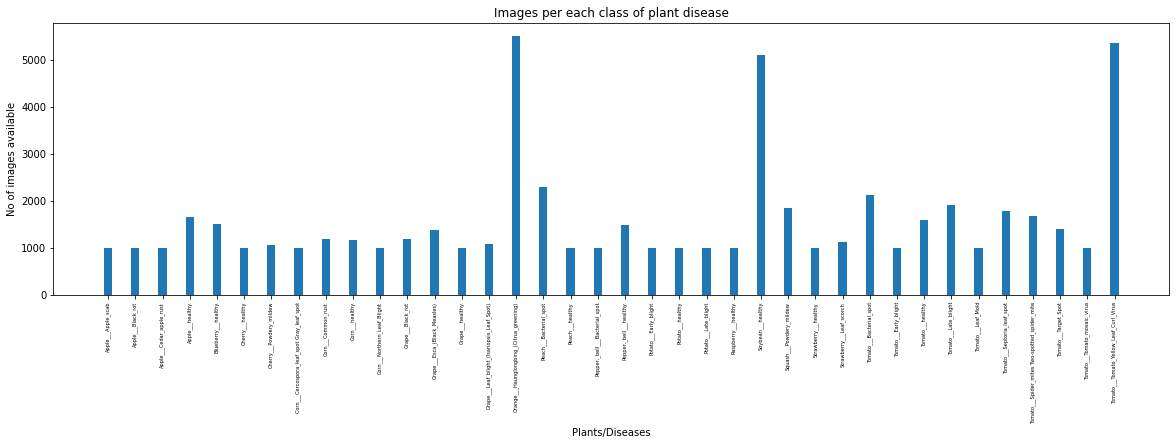

In [118]:
# plotting number of images available for each disease
index = [n for n in range(38)]
plt.figure(figsize=(20, 5))
plt.bar(index, [n for n in nums.values()], width=0.3)
plt.xlabel('Plants/Diseases', fontsize=10)
plt.ylabel('No of images available', fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

In [119]:
nums.values()

dict_values([1000, 1000, 1000, 1645, 1502, 1000, 1052, 1000, 1192, 1162, 1000, 1180, 1383, 1000, 1076, 5507, 2297, 1000, 1000, 1478, 1000, 1000, 1000, 1000, 5090, 1835, 1000, 1109, 2127, 1000, 1591, 1909, 1000, 1771, 1676, 1404, 1000, 5357])

In [120]:
# total images for training
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 60343 images for training


In [121]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') 

test_data = test_datagen.flow_from_directory(valid_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 60343 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [122]:
# Original: EfficientNetB0 feature vector (version 1)
efficientnet_url_v1 = "https://tfhub.dev/tensorflow/efficientnet/b0/feature-vector/1"

In [126]:
# Create model
efficientnet_model_v1_full = create_model(model_url=efficientnet_url_v1, # use EfficientNetB0 TensorFlow Hub URL
                                  num_classes=len(diseases))

# Compile EfficientNet model
efficientnet_model_v1_full.compile(loss='categorical_crossentropy',
                           optimizer=tf.keras.optimizers.Adam(),
                           metrics=['accuracy'])

# Fit EfficientNet model 
efficientnet_history_v1_full = efficientnet_model_v1_full.fit(train_data, # only use 10% of training data
                                              epochs=3, # train for 3 epochs
                                              steps_per_epoch=len(train_data),
                                              validation_data=test_data,
                                              validation_steps=0.25*len(test_data),
                                              callbacks=[create_tensorboard_callback(dir_name="tensorflow_hub", 
                                                                                     # Track logs under different experiment name
                                                                                     experiment_name="efficientnetB0_v1_full")])

Saving TensorBoard log files to: tensorflow_hub/efficientnetB0_v1_full/20231029-202803
Epoch 1/3
1886/1886 [==============================] - 673s 349ms/step - loss: 0.3685 - accuracy: 0.9205 - val_loss: 0.2765 - val_accuracy: 0.9166
Epoch 2/3
1886/1886 [==============================] - 389s 206ms/step - loss: 0.1041 - accuracy: 0.9746 - val_loss: 0.2234 - val_accuracy: 0.9293
Epoch 3/3
1886/1886 [==============================] - 300s 159ms/step - loss: 0.0695 - accuracy: 0.9825 - val_loss: 0.1914 - val_accuracy: 0.9379


In [ ]:
efficientnet_model_v1_full.evaluate(test_data)

In [128]:
efficientnet_model_v1_full.save("efficientnet_model_v1_full_94%")

INFO:tensorflow:Assets written to: efficientnet_model_v1_full_94%\assets


INFO:tensorflow:Assets written to: efficientnet_model_v1_full_94%\assets


In [4]:
final_model =tf.keras.models.load_model("efficientnet_model_v1_full_94%")
#final_model.evaluate(test_data)

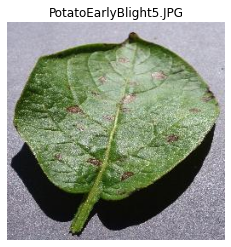

E:\Machine Learning-A-Z-Codes-Datasets\major project\plant-disease-classification\dataset\test\PotatoEarlyBlight5.JPG


In [161]:
img_1 = random_test_image(test_img_path=test_img_path,test_image=test_images)
print(img_1)

1/1 [==============================] - 0s 81ms/step


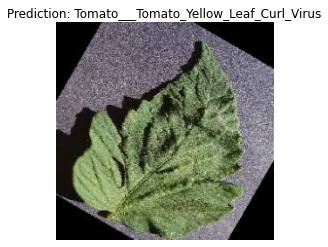

In [163]:
# Make a prediction using model_1
pred_and_plot(model=final_model, 
              filename=img_1, 
              class_names=class_names)

In [2]:
# Importing essential libraries and modules
import os
from flask import Flask, render_template, request, Markup, redirect
import numpy as np
import pandas as pd
import requests
import tensorflow as tf
from PIL import Image
import pickle
#import config
#from utils.disease import disease_dic
#from utils.fertilizer import fertilizer_dic

In [3]:
disease_model_path = r"E:\Machine Learning-A-Z-Codes-Datasets\major project\efficientnet_model_v1_full_94%"
disease_model = tf.keras.models.load_model(disease_model_path)

In [4]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [5]:
# Adjust function to work with multimodel, filename, class_names-class
def pred_disease(model, filename, class_names):
    """
    Imports an image located at filename, makes a prediction on it with
    a trained model and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    if len(pred[0]) > 1: # check for multi-class
        pred_class = class_names[pred.argmax()] # if more than one output, take the max
    else:
        pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

    return pred_class

In [6]:
disease_classes = ['Apple___Apple_scab',
                   'Apple___Black_rot',
                   'Apple___Cedar_apple_rust',
                   'Apple___healthy',
                   'Blueberry___healthy',
                   'Cherry___healthy',
                   'Cherry___Powdery_mildew',
                   'Corn___Cercospora_leaf_spot Gray_leaf_spot',
                   'Corn___Common_rust',
                   'Corn___healthy',
                   'Corn___Northern_Leaf_Blight',
                   'Grape___Black_rot',
                   'Grape___Esca_(Black_Measles)',
                   'Grape___healthy',
                   'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
                   'Orange___Haunglongbing_(Citrus_greening)',
                   'Peach___Bacterial_spot',
                   'Peach___healthy',
                   'Pepper,_bell___Bacterial_spot',
                   'Pepper,_bell___healthy',
                   'Potato___Early_blight',
                   'Potato___healthy',
                   'Potato___Late_blight',
                   'Raspberry___healthy',
                   'Soybean___healthy',
                   'Squash___Powdery_mildew',
                   'Strawberry___healthy',
                   'Strawberry___Leaf_scorch',
                   'Tomato___Bacterial_spot',
                   'Tomato___Early_blight',
                   'Tomato___healthy',
                   'Tomato___Late_blight',
                   'Tomato___Leaf_Mold',
                   'Tomato___Septoria_leaf_spot',
                   'Tomato___Spider_mites Two-spotted_spider_mite',
                   'Tomato___Target_Spot',
                   'Tomato___Tomato_mosaic_virus',
                   'Tomato___Tomato_Yellow_Leaf_Curl_Virus']


In [17]:
img_path = r"E:\Machine Learning-A-Z-Codes-Datasets\major project\test\AppleCedarRust3.JPG"

In [20]:
ans = pred_disease(model=disease_model, filename=img_path, class_names=disease_classes)

1/1 [==============================] - 1s 1s/step


In [21]:
ans

'Apple___Cedar_apple_rust'